# Wranging and Exploratory Data Analysis

## Loading pandas

In [16]:
import pandas as pd


## Loading the R magic along with the tidyverse

In [17]:
%load_ext rpy2.ipython
%R R.version.string
%R library(tidyverse); library(GGally)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


'GGally','forcats','stringr',...,'datasets','methods','base'


## Loading the data

In [18]:
datapy = pd.read_csv('data/iris.csv')
print(datapy.info())
print(datapy.describe().transpose())

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



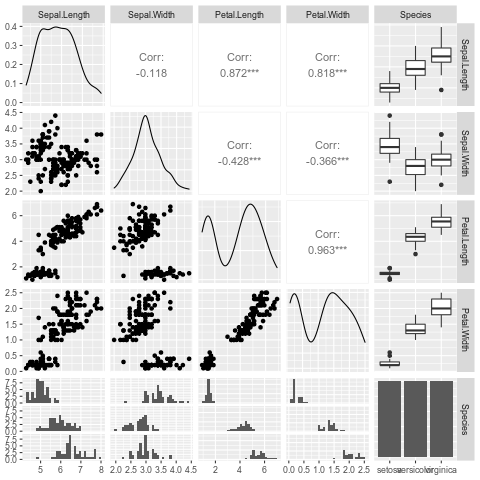

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7f87b6f8e800> [RTYPES.CLOSXP]
R classes: ('function',)

In [19]:
%R -i datapy print(ggpairs(datapy))

R[write to console]: `geom_smooth()` using formula 'y ~ x'



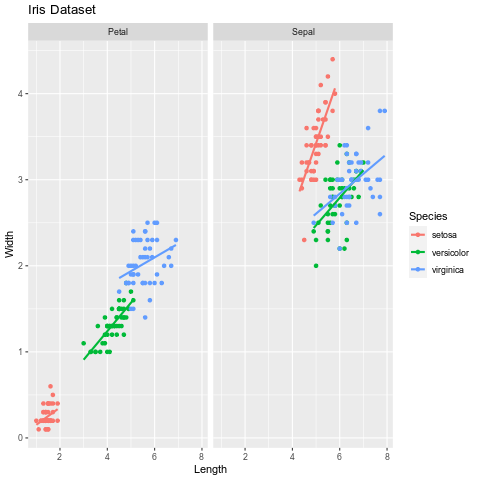

In [20]:
%%R -i datapy -o datapy_tidy

p <- datapy %>%
  pivot_longer(-Species, 
    names_to = c("characteristic", "type"),
    names_sep = "[.]") %>%
  pivot_wider(names_from = "type", values_from = "value") %>%
  unnest() %>%
  ggplot(aes(x=Length, y=Width, color = Species)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  facet_wrap(~characteristic) +
  labs(title="Iris Dataset")

datapy_tidy <- datapy %>%
  rename_all(.funs = function(x) str_replace(x, "[.]", "_"))
print(p)


## Saving the output for modeling

In [21]:
datapy_tidy.to_csv('data/iris_tidy.csv',index=False)